# POS Tagging

In [1]:
import nltk
import spacy
import numpy as np
import pandas as pd

C:\Users\yhutter\AppData\Local\Temp\ipykernel_31020\2498756251.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
nlp = spacy.load('en_core_web_trf')
#nlp = spacy.load("de_dep_news_trf") # Auf Deutsch
sentence = "The brown fox is quick and he is jumping over the lazy dog"

pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

C:\Users\yhutter\GitRepos\fhgr-ta\code\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\yhutter\GitRepos\fhgr-ta\code\venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\yhutter\GitRepos\fhgr-ta\code\venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [3]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


In [4]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


shallow_parsed_sent

In [6]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

In [8]:
spacy.explain("amod")

'adjectival modifier'

# Regular Expressions

In [16]:
import re

pattern = 'python'

s1 = 'Python is an excellent language'

# match only returns a match if regex match is found at the beginning of the string
re.match(pattern, s1) # Does not match because it is case sensitive
re.match(pattern, s1, flags=re.IGNORECASE)

<re.Match object; span=(0, 6), match='Python'>

In [17]:
# illustrating find and search methods using the re module
re.search(pattern, s1, re.IGNORECASE)

<re.Match object; span=(0, 6), match='Python'>

In [18]:
re.findall(pattern, s1, re.IGNORECASE)

['Python']

In [19]:
match_objs = re.finditer(pattern, s1, re.IGNORECASE)
for m in match_objs:
    print(f'Found match "{m.group(0)}" ranging from index {m.start()} - {m.end()}')

Found match "Python" ranging from index 0 - 6


In [20]:
re.sub(pattern, 'Java', s1, flags=re.IGNORECASE)

'Java is an excellent language'

In [22]:
re.findall(r'\w+', s1)

['Python', 'is', 'an', 'excellent', 'language']

# Texte normalisieren

In [40]:
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer

In [32]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [41]:
nlp = spacy.load('en_core_web_trf')
#nlp = spacy.load("de_dep_news_trf") # Auf Deutsch
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [42]:
def remove_stopwords(text, is_lower_case=False, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [38]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [36]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [33]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    # HR: hier wird mit einem compilierten Pattern gearbeitet; dieses wird aus allen Contraction-Schlüsseln zusammengesetzt
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
    
    # HR: innere Funktion
    # HR: Achtung - die Sarkar-Funktion arbeitet nicht immer fehlerfrei. Hier (hoffentlich) korrigiert.
    def expand_match(contraction):
        match = contraction.group(0)
        # Contraction-Muster sind alle kleingeschrieben
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())                     
        # Grossschreibung wiederherstellen
        if match[0].isupper():
            expanded_contraction = expanded_contraction[0].upper() + expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)  # expand match wird für jeden match aufgerufen
    expanded_text = re.sub("'", "", expanded_text)  # noch etwas aufräumen
    return expanded_text

In [29]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [26]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

In [23]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [43]:
sample_text = ("US unveils world's most powerful supercomputer, beats China. " 
               "The US has unveiled the world's most powerful supercomputer called 'Summit', " 
               "beating the previous record-holder China's Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, "
               "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")

{'Original': sample_text,
 'Processed': normalize_corpus([sample_text])[0]}

{'Original': "US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts.",
 'Processed': 'us unveil worlds powerful supercomputer beat china us unveil world powerful supercomputer call summit beat previous record holder chinas sunway taihulight peak performance trillion calculation per second twice fast sunway taihulight capable trillion calculation per second summit server reportedly take size two tennis court'}

# Tagger

In [49]:
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger
from nltk.corpus import treebank
from nltk.tag import RegexpTagger

In [50]:
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
sentence = "US unveils world's most powerful supercomputer, beats China."

# define regex tag patterns
patterns = [
    (r'.*ing$', 'VBG'),  # gerunds
    (r'.*ed$', 'VBD'),  # simple past
    (r'.*es$', 'VBZ'),  # 3rd singular present
    (r'.*ould$', 'MD'),  # modals
    (r'.*\'s$', 'NN$'),  # possessive nouns
    (r'.*s$', 'NNS'),  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')  # nouns (default) ... 
]
rt = RegexpTagger(patterns)

In [51]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff


ct = combined_tagger(train_data=train_data,
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)

print(ct.accuracy(test_data))
print(ct.tag(nltk.word_tokenize(sentence)))

0.9094781682641108
[('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


# Klassisches Feature Engineering

In [52]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import sklearn

In [53]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [55]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]

In [56]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Bag of Words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)  # minimale und maximale Dokumentenhäufigkeit, hier float, also Anteile - es werden alle Wörter gezählt
cv_matrix = cv.fit_transform(norm_corpus)

# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [61]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## TF-IDF

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## TF-IDF from Scratch

In [76]:
from collections import Counter
import pandas as pd
import scipy.sparse as sp
from numpy.linalg import norm

In [69]:
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] for word in doc]))  # die list comprehension ermittelt alle Wörter, set eliminiert doppelt und list macht wieder eine Liste daraus; die list comprehension ist wieder etwas kompliziert zu lesen
def_feature_dict = {w: 0 for w in unique_words}

# build bag of words features for each document - term frequencies
bow_features_list = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())  # zählt die tatsächlich vorkommenden Wörter
    all_features = Counter(def_feature_dict)  # das ist der Default-Counter: alle überhaupt vorkommenden Wörter auf Count 0
    bow_feature_doc.update(all_features)  # Counter zusammenzählen
    bow_features_list.append(bow_feature_doc)  # und abspeichern

bow_features = pd.DataFrame(bow_features_list)
bow_features

,sky,blue,beautiful,eggs,beans,quick,brown,love,breakfast,toast,bacon,sausages,lazy,green,fox,kings,today,dog,jumps,ham
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0
3,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1
5,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0


In [70]:
feature_names = list(bow_features.columns)  
df_count = Counter(feature_names)  # initialisiert den Counter für jedes Wort auf 1 - entspricht dem +1 oben
for cnt in bow_features_list:
    for wrd in cnt.keys():
        if cnt[wrd] > 0:
            df_count[wrd] += 1
pd.DataFrame.from_dict(df_count, orient="index").T

,sky,blue,beautiful,eggs,beans,quick,brown,love,breakfast,toast,bacon,sausages,lazy,green,fox,kings,today,dog,jumps,ham
0,4,5,4,3,2,4,4,3,2,2,3,3,4,2,4,2,2,4,2,3


> Häufige Wörter haben kleine Werte!

In [74]:
# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df  # adding 1 to smoothen idf later

# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,eggs,beans,quick,brown,love,breakfast,toast,bacon,sausages,lazy,green,fox,kings,today,dog,jumps,ham
0,1.81,1.59,1.81,2.1,2.5,1.81,1.81,2.1,2.5,2.5,2.1,2.1,1.81,2.5,1.81,2.5,2.5,1.81,2.5,2.1


In [75]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')  # bow_features war dataframe, jetzt numpy array
tfidf = tf * idf  # Matrixmultiplikation
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,eggs,beans,quick,brown,love,breakfast,toast,bacon,sausages,lazy,green,fox,kings,today,dog,jumps,ham
0,1.81,1.59,1.81,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1,1.81,1.59,1.81,0.0,0.0,0.00,0.00,2.1,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0
2,0.00,0.00,0.00,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0,1.81,0.0,0.0,1.81,2.5,0.0
3,0.00,0.00,0.00,2.1,2.5,0.00,0.00,0.0,2.5,2.5,2.1,2.1,0.00,0.0,0.00,2.5,0.0,0.00,0.0,2.1
4,0.00,0.00,0.00,2.1,0.0,0.00,0.00,2.1,0.0,0.0,2.1,2.1,0.00,2.5,0.00,0.0,0.0,0.00,0.0,2.1
5,0.00,1.59,0.00,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0,1.81,0.0,0.0,1.81,0.0,0.0
6,3.62,1.59,1.81,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,2.5,0.00,0.0,0.0
7,0.00,0.00,0.00,0.0,0.0,1.81,1.81,0.0,0.0,0.0,0.0,0.0,1.81,0.0,1.81,0.0,0.0,1.81,0.0,0.0


In [78]:
# compute L2 norms 
norms = norm(tfidf, axis=1)  # Normierungswert für jede Zeile (Dokument); default-norm ist die l2, die wir oben schon kennengelernt haben (Summe der Quadrate ist 1)

# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,eggs,beans,quick,brown,love,breakfast,toast,bacon,sausages,lazy,green,fox,kings,today,dog,jumps,ham
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.38,0.00,0.0,0.38,0.53,0.00
3,0.00,0.00,0.00,0.32,0.38,0.00,0.00,0.00,0.38,0.38,0.32,0.32,0.00,0.00,0.00,0.38,0.0,0.00,0.00,0.32
4,0.00,0.00,0.00,0.39,0.00,0.00,0.00,0.39,0.00,0.00,0.39,0.39,0.00,0.47,0.00,0.00,0.0,0.00,0.00,0.39
5,0.00,0.37,0.00,0.00,0.00,0.42,0.42,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.0,0.42,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.0,0.45,0.00,0.00


# Dokumentenähnlichkeit

In [82]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [81]:
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()
similarity_matrix_pdist = pdist(tv_matrix, "cosine")
pd.DataFrame(squareform(similarity_matrix_pdist))

,0,1,2,3,4,5,6,7
0,0.000000,0.179401,1.000000,1.000000,1.000000,0.807647,0.182754,1.000000
1,0.179401,0.000000,1.000000,1.000000,0.774511,0.842155,0.329369,1.000000
2,1.000000,1.000000,0.000000,1.000000,1.000000,0.208179,1.000000,0.149484
3,1.000000,1.000000,1.000000,0.000000,0.493134,1.000000,1.000000,1.000000
4,1.000000,0.774511,1.000000,0.493134,0.000000,1.000000,1.000000,1.000000
5,0.807647,0.842155,0.208179,1.000000,1.000000,0.000000,0.884512,0.069011
6,0.182754,0.329369,1.000000,1.000000,1.000000,0.884512,0.000000,1.000000
7,1.000000,1.000000,0.149484,1.000000,1.000000,0.069011,1.000000,0.000000


In [83]:
#wir können wie besprochen "ward" nicht verwenden
# also probieren wir eine andere Methode aus: single link

Z = linkage(similarity_matrix_pdist, 'single')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

#Erklärung: Dokumente 5 und 7 haben den geringsten Abstand, daher werden sie
# auch zuerst zu einem Cluster zusammengesetzt, mit dem Bezeichner 8
# Der Abstand von 2 zu diesem neuen Cluster ist der kleinere der Abstände von 2 zu 5 oder 7
# Der nächst kleinste Abstand ist der zwischen 0 und 1 usw.

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.069011,2.0
1,2.0,8.0,0.149484,3.0
2,0.0,1.0,0.179401,2.0
3,6.0,10.0,0.182754,3.0
4,3.0,4.0,0.493134,2.0
5,11.0,12.0,0.774511,5.0
6,9.0,13.0,0.807647,8.0


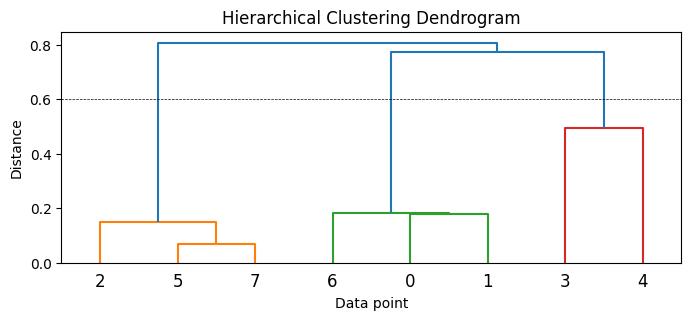

In [84]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=0.6, c='k', ls='--', lw=0.5)

# Named Entity Recognition (NER)

In [95]:
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn_crfsuite

In [89]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        # das Wort an der aktuellen Position
        # 'bias': 1.0, HR: scheint keine Rolle zu spielen
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        # das Wort davor (falls vorhanden)
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        # das Wort danach (falls vorhanden)
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

In [86]:
df = pd.read_csv("./ner_dataset.csv", encoding='ISO-8859-1')
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Sentence #,Sentence: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Word,Thousands,of,demonstrators,have,marched,through,London,to,protest,the,war,in,Iraq,and,demand,the,withdrawal,of,British,troops
POS,NNS,IN,NNS,VBP,VBN,IN,NNP,TO,VB,DT,NN,IN,NNP,CC,VB,DT,NN,IN,JJ,NNS
Tag,O,O,O,O,O,O,B-geo,O,O,O,O,O,B-geo,O,O,O,O,O,B-gpe,O


In [91]:
# Sentence # auffüllen
df = df.fillna(method='ffill')  # forward fill

# Funktion zum Zusammenstellen der Werte in je einem Tripel pro Wort: (Wort, POS-Tag, NER-Tag)
#  übergeben wird der Dataframe, mit dem Zip werden die Einzelwert-Listen zu einer Liste zusammengefasst; dann zu einem Tripel zusammengestellt
agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(), 
                                                   s['POS'].values.tolist(), 
                                                   s['Tag'].values.tolist())]

grouped_df = df.groupby('Sentence #').apply(agg_func)  # Gruppieren anhand der Satznummer (also jeder Satz für sich)

print(grouped_df[grouped_df.index == 'Sentence: 1'].values)

C:\Users\yhutter\AppData\Local\Temp\ipykernel_31020\4263067288.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # forward fill


[list([('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')])]


C:\Users\yhutter\AppData\Local\Temp\ipykernel_31020\4263067288.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('Sentence #').apply(agg_func)  # Gruppieren anhand der Satznummer (also jeder Satz für sich)


In [92]:
sentences = [s for s in grouped_df]
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [94]:
X = np.array([sent2features(s) for s in sentences], dtype=object)
Y = np.array([sent2labels(s) for s in sentences], dtype=object)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((35969,), (11990,))

In [96]:
crf = sklearn_crfsuite.CRF(algorithm='lbfgs',
                           c1=0.1,
                           c2=0.1,
                           max_iterations=100,
                           all_possible_transitions=True,
                           verbose=True)
crf.fit(X_train, y_train)

loading training data to CRFsuite: 100%|███████████████████| 35969/35969 [00:06<00:00, 5647.90it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 133612
Seconds required: 1.376

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=2.54  loss=1452006.34 active=132620 feature_norm=1.00
Iter 2   time=3.35  loss=1060401.86 active=131946 feature_norm=5.56
Iter 3   time=1.08  loss=796426.72 active=125323 feature_norm=4.88
Iter 4   time=5.30  loss=469102.20 active=126078 feature_norm=3.95
Iter 5   time=1.12  loss=406489.87 active=131847 feature_norm=4.75
Iter 6   time=1.15  loss=344518.07 active=130981 feature_norm=5.02
Iter 7   time=1.14  loss=302282.92 active=130924 feature_norm=5.68
Iter 8   time=1.17  loss=254083.73 active=126248 feature_norm=7.16
Iter 9   time=1.15  loss=217889.18 active=115925 feature_nor

AttributeError: 'CRF' object has no attribute 'keep_tempfiles'

AttributeError: 'CRF' object has no attribute 'keep_tempfiles'

AttributeError: 'CRF' object has no attribute 'keep_tempfiles'

# Sentiment Analyse